<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li></ul></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проверка алгоритма</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

In [3]:
df

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0
...,...,...,...,...,...
4995,0,28.0,35700.0,2,0
4996,0,34.0,52400.0,1,0
4997,0,20.0,33900.0,2,0
4998,1,22.0,32700.0,3,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [5]:
value = df['Пол'].value_counts()
print(value)

0    2505
1    2495
Name: Пол, dtype: int64


In [6]:
df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


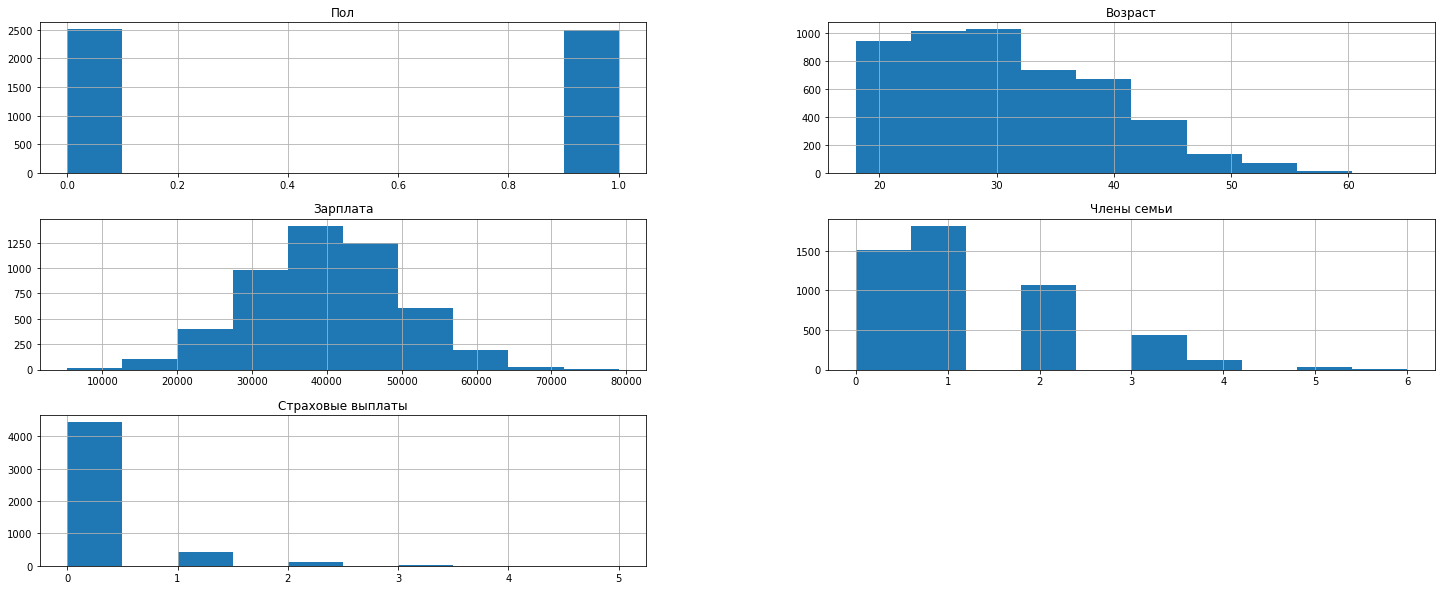

In [7]:
df.hist(figsize=(25,10));

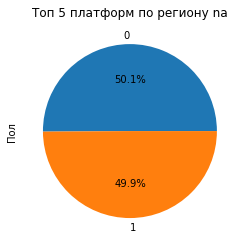

In [8]:
value.plot(kind = 'pie',title = 'Топ 5 платформ по региону na',autopct='%1.1f%%');

#### Вывод

Исходя из даиграммы видно:
* Женского и мужского пола поровну
* Распределение по возрасту смещено влево,видимо чаще всего страховками пользуются люди примерно до 30 лет,после идет заметный спад 
* У зарплат - распредлеение нормальное
* В категории "члены семье" видна тенденция, показыввающая, что людей с большим кол-вом членов семье все меньше и меньше.
* Страховые выплаты - не очень понтяно, что означает данный столбец, но скорее всего, это обозначение количества страховых выплат.Можно предполодить, что как правило страховки не выплачиваются из-за того, что страховой случай не настал.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** качество не изменится 

**Обоснование:** $$
w = (X^T X)^{-1} X^T y
$$
**Подставляем вместо X - XM:** $$
w = ((XM)^T XM)^{-1} (XM)^T y
$$
**Раскроим скобки :** $$
w'=(M^TX^TXM)^{-1}X^TM^T y
$$

**Cократим:** $$
w'=M^{-1}(X^TX)^{-1}X^{T}y
$$
**Получается что новые веса w' варажаются через старые веса w:** $$
w'=M^{-1}w
$$

$$
a = Xw = XEw = XPP^{-1}w = (XP)P^{-1}w = (XP)w'
$$

$$
w' = ((XP)^T XP)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} (XP)^T y
$$
$$
w' = (P^T (X^T X) P)^{-1} P^T X^T y
$$
$$
w' = P^{-1}(X^T X)^{-1} (P^T)^{-1}P^T X^T y
$$
$$
w' = P^{-1}(X^T X)^{-1} (P^T)^{-1}E X^T y
$$
$$
w' = P^{-1}(X^T X)^{-1} (P^T)^{-1}E X^T y
$$
$$
w' = P^{-1}w
$$

## Проверка алгоритма

In [9]:
target = df['Страховые выплаты']
features = df.drop('Страховые выплаты',axis=1)

Сгенирируем матрицу 

In [10]:
martix_gen = np.random.normal(size=(4, 4))

Проверим матрицу на обратимость 

In [11]:
martix_bac = np.linalg.inv(martix_gen) 

Перемножим сгениерированную матрицу и ту же матрицу, но обратимую

In [12]:
matrix = features.values
matrix_new = matrix@martix_bac
features_code = pd.DataFrame (matrix_new, columns = features.columns)

In [13]:
features_code

,Пол,Возраст,Зарплата,Члены семьи
0,24076.744082,-72170.935402,37843.579141,86817.167943
1,18460.677369,-55347.795627,28971.075891,66545.794350
2,10205.565970,-30600.294546,16005.357483,36784.168841
3,20228.925450,-60625.669644,31834.145178,72956.051564
4,12675.581171,-38001.023066,19905.110934,45700.015504
...,...,...,...,...
4995,17328.144287,-51940.577239,27239.145179,62481.686373
4996,25427.292220,-76210.183032,39992.154692,91695.386233
4997,16447.936065,-49296.825996,25875.208532,59315.988109
4998,15867.693439,-47562.088141,24956.146640,57222.639988


Oбучим модель

In [14]:
class LinearRegression:
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        w = np.linalg.inv(X.T@X)@X.T@y
        self.w = w[1:]
        self.w0 = w[0]

    def predict(self, test_features):
        return test_features.dot(self.w) + self.w0

In [15]:
model = LinearRegression()
model.fit(features,target)
prediction = model.predict(features)
print(r2_score(target,prediction))


0.4249455028666801


In [16]:
model = LinearRegression()
model.fit(features_code,target)
prediction = model.predict(features_code)
print(r2_score(target,prediction))


0.4249455028666337


### Вывод

Метрики не изменились.

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные загружены
- [x]  Выполнен шаг 2: получен ответ на вопрос об умножении матриц
    - [x]  Указан правильный вариант ответа
    - [x]  Вариант обоснован
- [x]  Выполнен шаг 3: предложен алгоритм преобразования
    - [x]  Алгоритм описан
    - [x]  Алгоритм обоснован
- [ ]  Выполнен шаг 4: алгоритм проверен
    - [ ]  Алгоритм реализован
    - [ ]  Проведено сравнение качества моделей до и после преобразования